## Objectives for Crime Data Analysis

1. Understand Crime Trends: Analyze yearly crime rates from 2009 to 2024 to identify trends.

2. Identify High/Low Crime Years: Determine years with the highest and lowest crime rates.

3. Crime Type Distribution: Identify the most common types of crimes.

4. Neighborhood Crime Rates: Find neighborhoods with the highest and lowest crime rates.

5. Peak Crime Times: Identify times of day and days of the week with the most crimes.

6. Provide Crime Prevention Insights: Suggest strategies for reducing crime based on the analysis.

## For Libraries

In [1]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Load the dataset

file_path = 'Crime_Reports_20240701.csv'
crime_data = pd.read_csv(file_path)

## Auditing the Data

In [11]:
# first five rows of the dataset

print("First Five Rows of the Dataset:")
print(crime_data.head())

First Five Rows of the Dataset:
  File Number      Date of Report               Crime  Reporting Area  \
0  2009-01323 2009-02-21 09:53:00             Threats           105.0   
1  2009-01324 2009-02-21 09:59:00          Auto Theft          1109.0   
2  2009-01327 2009-02-21 12:32:00         Hit and Run          1109.0   
3  2009-01331 2009-02-21 15:05:00      Larceny (Misc)          1303.0   
5  2009-01357 2009-02-22 21:39:00  Aggravated Assault          1109.0   

      Neighborhood                       Location         Crime Start  \
0   East Cambridge     100 OTIS ST, Cambridge, MA 2009-02-21 09:20:00   
1  North Cambridge  400 RINDGE AVE, Cambridge, MA 2009-02-20 22:30:00   
2  North Cambridge  400 RINDGE AVE, Cambridge, MA 2009-02-19 21:00:00   
3  Strawberry Hill  0 NORUMBEGA ST, Cambridge, MA 2009-02-21 15:00:00   
5  North Cambridge  400 RINDGE AVE, Cambridge, MA 2009-02-22 21:39:00   

            Crime End  
0 2024-07-16 09:30:00  
1 2009-02-21 10:00:00  
2 2009-02-21 12:00

In [12]:
# Display the last five rows of the dataset

print("\nLast Five Rows of the Dataset:")
print(crime_data.tail())


Last Five Rows of the Dataset:
      File Number      Date of Report               Crime  Reporting Area  \
95918  2024-03755 2024-05-07 13:13:00     Larceny from MV           411.0   
95919  2024-03756 2024-05-07 14:41:00            Accident           611.0   
95920  2024-03777 2024-05-07 20:13:00  Larceny of Bicycle           411.0   
95921  2024-03806 2024-05-08 16:09:00     Larceny from MV          1005.0   
95922  2024-03824 2024-05-09 10:23:00         Hit and Run          1204.0   

         Neighborhood                                       Location  \
95918          Area 4             100 BISHOP ALLEN DR, Cambridge, MA   
95919   Mid-Cambridge  MASSACHUSETTS AVE & PEABODY ST, Cambridge, MA   
95920          Area 4                   0 COLUMBIA ST, Cambridge, MA   
95921  West Cambridge                     0 FOSTER PL, Cambridge, MA   
95922       Highlands           200 Alewife Brook Pky, Cambridge, MA   

              Crime Start           Crime End  
95918 2024-05-04 12:00:0

In [13]:
# Display the shape of the dataset

print("\nShape of the Dataset:")
print(crime_data.shape)


Shape of the Dataset:
(57621, 8)


In [14]:
# Display the columns of the dataset

print("\nColumns in the Dataset:")
print(crime_data.columns)


Columns in the Dataset:
Index(['File Number', 'Date of Report', 'Crime', 'Reporting Area',
       'Neighborhood', 'Location', 'Crime Start', 'Crime End'],
      dtype='object')


In [4]:
# Convert 'Date of Report' and 'Crime Date Time' to datetime format
# This helps in performing time-based operations and analysis


crime_data['Date of Report'] = pd.to_datetime(crime_data['Date of Report'], errors='coerce')

In [5]:
# Split 'Crime Date Time' into 'Crime Start' and 'Crime End'

crime_data[['Crime Start', 'Crime End']] = crime_data['Crime Date Time'].str.split(' - ', expand=True)
crime_data['Crime Start'] = pd.to_datetime(crime_data['Crime Start'], errors='coerce')
crime_data['Crime End'] = pd.to_datetime(crime_data['Crime End'], errors='coerce')

In [6]:
# Drop the original 'Crime Date Time' column as it's now split into two separate columns

crime_data.drop(columns=['Crime Date Time'], inplace=True)

In [7]:
# Remove rows with missing values in important columns
crime_data.dropna(subset=['Crime Start', 'Crime End', 'Reporting Area', 'Neighborhood', 'Location'], inplace=True)

In [8]:
# Summary of the dataset
print("Summary of the Dataset:")
print(crime_data.describe(include='all'))

Summary of the Dataset:


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5036\2741658095.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(crime_data.describe(include='all'))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5036\2741658095.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(crime_data.describe(include='all'))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5036\2741658095.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and a

       File Number       Date of Report            Crime  Reporting Area  \
count        57621                57621            57621    57621.000000   
unique       57621                57290               54             NaN   
top     2009-01323  2023-12-13 16:54:00  Larceny from MV             NaN   
freq             1                    3             6787             NaN   
first          NaN  2009-01-01 01:43:00              NaN             NaN   
last           NaN  2024-05-31 22:04:00              NaN             NaN   
mean           NaN                  NaN              NaN      643.153694   
std            NaN                  NaN              NaN      337.399597   
min            NaN                  NaN              NaN      101.000000   
25%            NaN                  NaN              NaN      407.000000   
50%            NaN                  NaN              NaN      605.000000   
75%            NaN                  NaN              NaN     1002.000000   
max         

In [9]:
# Print data types and missing values information
print("\nData Types and Missing Values:")
print(crime_data.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57621 entries, 0 to 95922
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   File Number     57621 non-null  object        
 1   Date of Report  57621 non-null  datetime64[ns]
 2   Crime           57621 non-null  object        
 3   Reporting Area  57621 non-null  float64       
 4   Neighborhood    57621 non-null  object        
 5   Location        57621 non-null  object        
 6   Crime Start     57621 non-null  datetime64[ns]
 7   Crime End       57621 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(4)
memory usage: 4.0+ MB
None


## Exploratory Data Analysis (EDA)

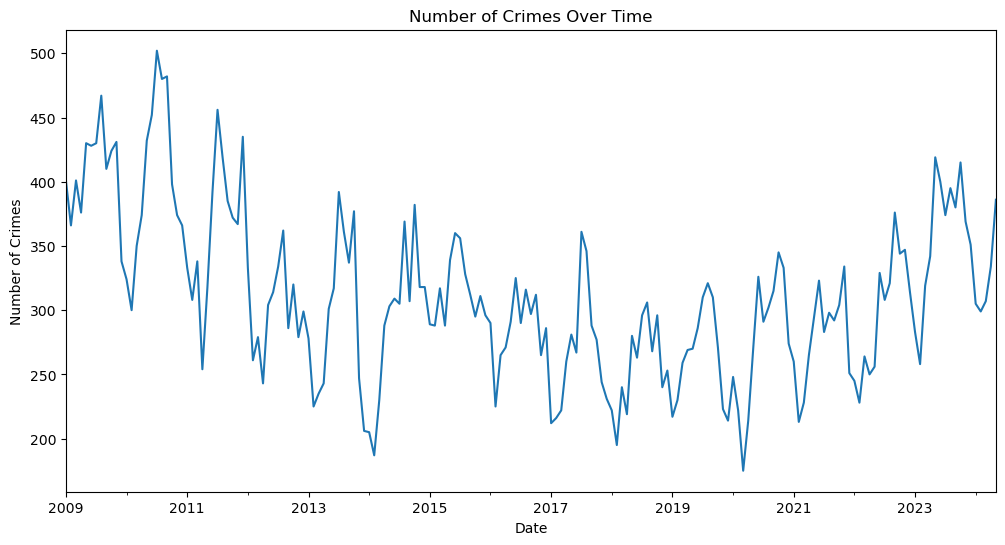

In [15]:
# Plot the number of crimes over time

plt.figure(figsize=(12, 6))
crime_data['Date of Report'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title('Number of Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

In [17]:
# Find the year with the lowest and highest crime rates

crime_data['Year'] = crime_data['Date of Report'].dt.year
crimes_per_year = crime_data['Year'].value_counts().sort_index()
lowest_crime_year = crimes_per_year.idxmin()
highest_crime_year = crimes_per_year.idxmax()
print(f"\nThe year with the lowest crime rate is {lowest_crime_year}.")
print(f"The year with the highest crime rate is {highest_crime_year}.")


The year with the lowest crime rate is 2024.
The year with the highest crime rate is 2009.


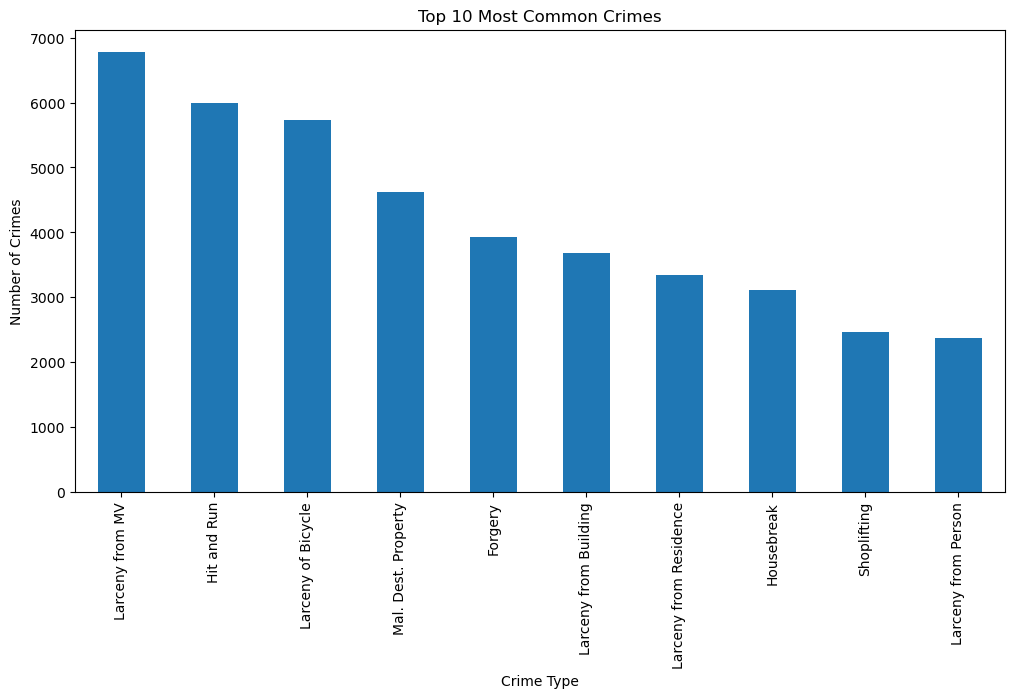

In [43]:
# Plot the most common crime types

plt.figure(figsize=(12, 6))
crime_data['Crime'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Crimes')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.show()

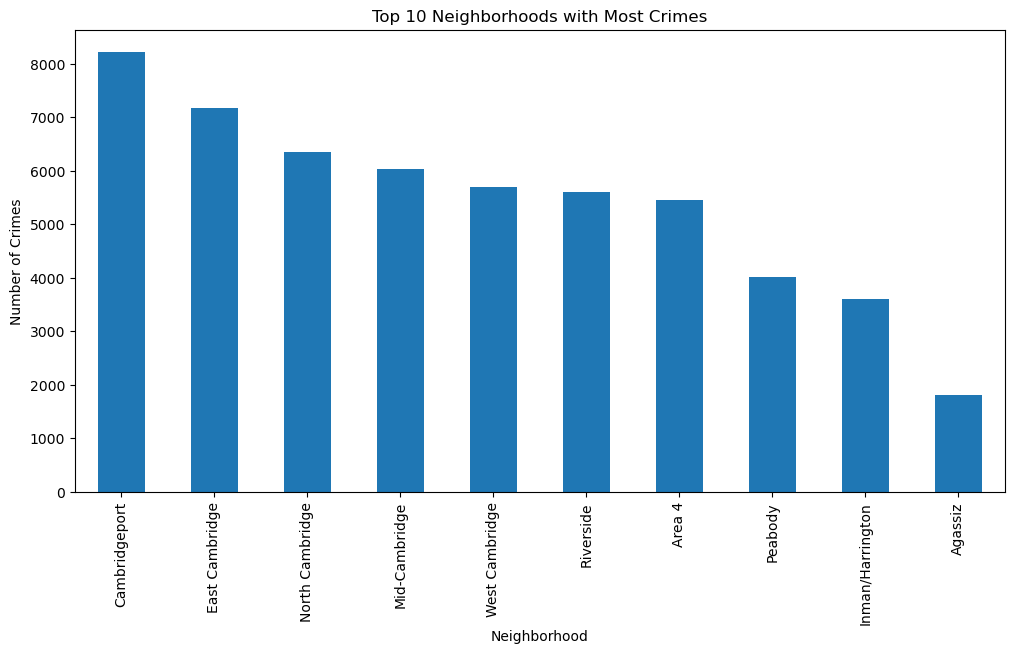

In [39]:
# Plot the neighborhoods with the most crimes

plt.figure(figsize=(12, 6))
crime_data['Neighborhood'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Neighborhoods with Most Crimes')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.show()

In [40]:
# Create a heatmap of crime occurrences by hour and day of the week

# Extract hour and day of the week from the 'Crime Start' datetime

crime_data['Hour'] = crime_data['Crime Start'].dt.hour
crime_data['DayOfWeek'] = crime_data['Crime Start'].dt.day_name()

In [41]:
# Find the hour with the most crimes

hourly_crimes = crime_data['Hour'].value_counts()
most_crime_hour = hourly_crimes.idxmax()
print(f"\nThe hour with the highest crime rate is {most_crime_hour}:00.")


The hour with the highest crime rate is 12:00.


In [42]:
# Create a table of hours and days of the week

hour_day_crosstab = pd.crosstab(crime_data['Hour'], crime_data['DayOfWeek'])

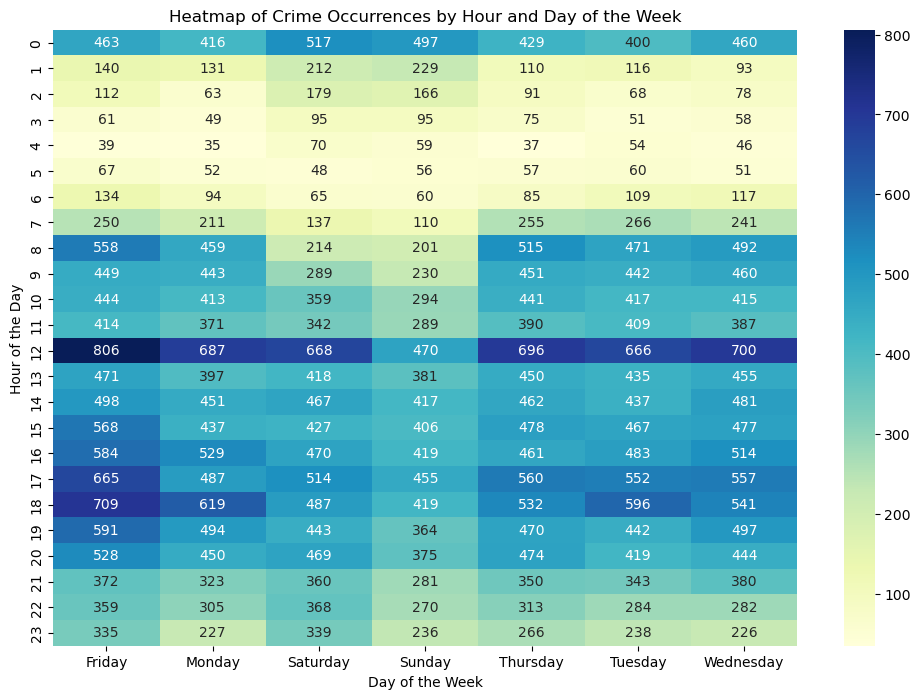

In [24]:
# Plot the heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(hour_day_crosstab, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Heatmap of Crime Occurrences by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

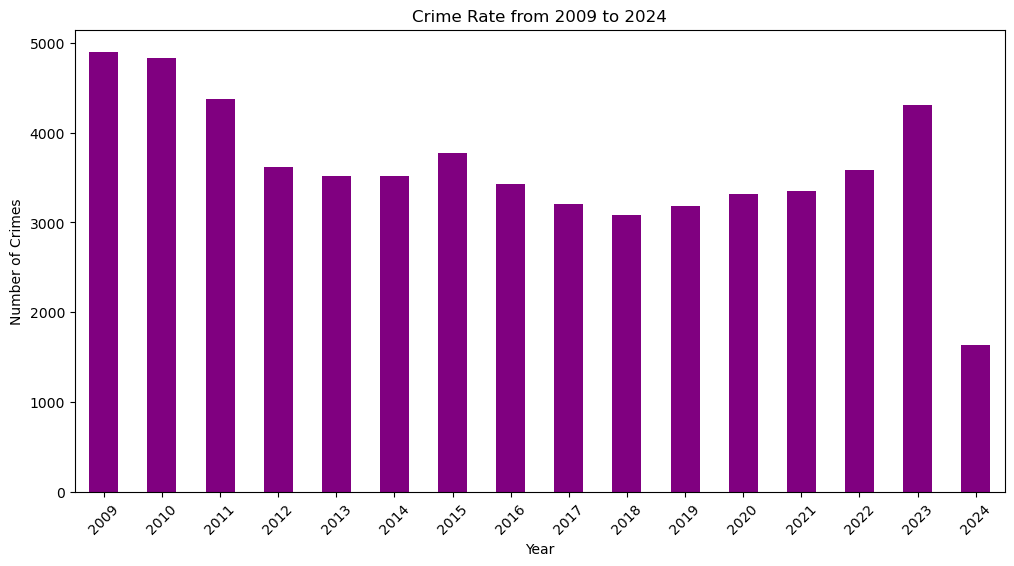

In [29]:
# Create a bar chart for crime rates per year from 2009 to 2024

plt.figure(figsize=(12, 6))
crimes_per_year.plot(kind='bar', color='purple')
plt.title('Crime Rate from 2009 to 2024')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

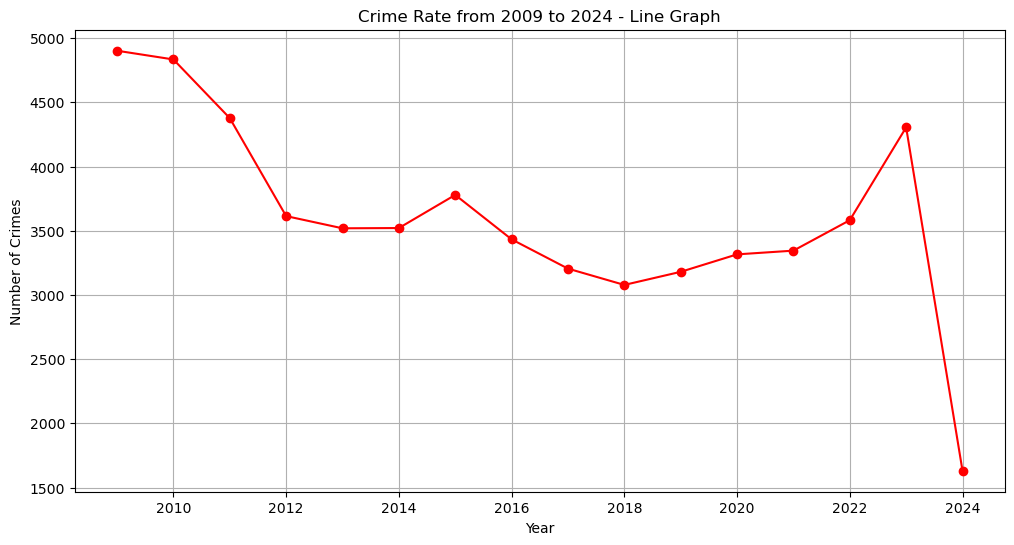

In [30]:
# Create a line graph for crime rates per year from 2009 to 2024

plt.figure(figsize=(12, 6))
crimes_per_year.plot(kind='line', marker='o', linestyle='-', color='red')
plt.title('Crime Rate from 2009 to 2024 - Line Graph')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

## Suggestions for crime prevention based on the findings

In [31]:
print("\nSuggestions for Crime Prevention:")
print("1. Increase police patrols during peak crime hours.")
print("2. Implement community policing programs in high-crime neighborhoods.")
print("3. Enhance surveillance and lighting in areas with high rates of specific crimes.")
print("4. Conduct crime prevention workshops focusing on common crime types.")
print("5. Use data to allocate resources efficiently and respond to crime patterns.")


Suggestions for Crime Prevention:
1. Increase police patrols during peak crime hours.
2. Implement community policing programs in high-crime neighborhoods.
3. Enhance surveillance and lighting in areas with high rates of specific crimes.
4. Conduct crime prevention workshops focusing on common crime types.
5. Use data to allocate resources efficiently and respond to crime patterns.
